Suhani Singh

INST 447

Hospital Quality Patterns in CMS Timely and Effective Care Data

In [1]:
# Setup and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# API-Based Data Retrieval (CMS Open Data API)
# This API call is used to demonstrate REST-based access
# Purpose: demonstrate programmatic acquisition + validate schema; analysis uses full CSV snapshots for scale/reproducibility
import requests

# CMS Provider Data API (Timely & Effective Care dataset)
url = "https://data.cms.gov/provider-data/api/1/datastore/query/yv7e-xc69/0"

params = {
    "limit": 100  # keep it small for a demo
}

resp = requests.get(url, params=params)
resp.raise_for_status()
data = resp.json()

# Records usually live under one of these keys depending on CMS API response
# We'll handle both common patterns safely
records = (
    data.get("results") or
    data.get("data") or
    data.get("records") or
    []
)

api_df = pd.DataFrame(records)

print("API pull rows/cols:", api_df.shape)
display(api_df.head())
print("API columns:", list(api_df.columns)[:20])

API pull rows/cols: (100, 16)


,facility_id,facility_name,address,citytown,state,zip_code,countyparish,telephone_number,_condition,measure_id,measure_name,score,sample,footnote,start_date,end_date
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Emergency Department,EDV,Emergency department volume,high,,,01/01/2023,12/31/2023
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Electronic Clinical Quality Measure,GMCS,Global Malnutrition Composite Score,Not Available,Not Available,5,01/01/2024,12/31/2024
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Electronic Clinical Quality Measure,GMCS_Malnutrition_Diagnosis_Documented,Global Malnutrition Composite Score: Malnutrit...,Not Available,Not Available,5,01/01/2024,12/31/2024
3,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Electronic Clinical Quality Measure,GMCS_Malnutrition_Screening,Global Malnutrition Composite Score: Malnutrit...,Not Available,Not Available,5,01/01/2024,12/31/2024
4,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Electronic Clinical Quality Measure,GMCS_Nutrition_Assessment,Global Malnutrition Composite Score: Nutrition...,Not Available,Not Available,5,01/01/2024,12/31/2024


API columns: ['facility_id', 'facility_name', 'address', 'citytown', 'state', 'zip_code', 'countyparish', 'telephone_number', '_condition', 'measure_id', 'measure_name', 'score', 'sample', 'footnote', 'start_date', 'end_date']


In [3]:
# CMS Provider Data API (Hospital General Information dataset)
import requests

url2 = "https://data.cms.gov/provider-data/api/1/datastore/query/xubh-q36u/0"
params2 = {"limit": 100}

resp2 = requests.get(url2, params=params2)
resp2.raise_for_status()
data2 = resp2.json()

records2 = (data2.get("results") or data2.get("data") or data2.get("records") or [])
api_hosp_df = pd.DataFrame(records2)

print("Hospital API pull rows/cols:", api_hosp_df.shape)
display(api_hosp_df.head())
print("Hospital API columns:", list(api_hosp_df.columns)[:20])

Hospital API pull rows/cols: (100, 38)


,facility_id,facility_name,address,citytown,state,zip_code,countyparish,telephone_number,hospital_type,hospital_ownership,...,count_of_readm_measures_better,count_of_readm_measures_no_different,count_of_readm_measures_worse,readm_group_footnote,pt_exp_group_measure_count,count_of_facility_pt_exp_measures,pt_exp_group_footnote,te_group_measure_count,count_of_facility_te_measures,te_group_footnote
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,...,0,11,0,,8,8,,12,11,
1,010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,...,0,8,1,,8,8,,12,12,
2,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,Acute Care Hospitals,Proprietary,...,0,8,1,,8,8,,12,10,
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,...,0,7,0,,8,8,,12,7,
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,...,0,2,0,,8,Not Available,5,12,6,


Hospital API columns: ['facility_id', 'facility_name', 'address', 'citytown', 'state', 'zip_code', 'countyparish', 'telephone_number', 'hospital_type', 'hospital_ownership', 'emergency_services', 'meets_criteria_for_birthing_friendly_designation', 'hospital_overall_rating', 'hospital_overall_rating_footnote', 'mort_group_measure_count', 'count_of_facility_mort_measures', 'count_of_mort_measures_better', 'count_of_mort_measures_no_different', 'count_of_mort_measures_worse', 'mort_group_footnote']


In [4]:
## Load CMS Datasets (CSV Snapshots)
timely = pd.read_csv("Timely_and_Effective_Care-Hospital.csv", low_memory=False)
hosp = pd.read_csv("Hospital_General_Information.csv", low_memory=False)

print("Timely shape:", timely.shape)
print("Hospital info shape:", hosp.shape)

display(timely.head(3))
display(hosp.head(3))

Timely shape: (138182, 16)
Hospital info shape: (5421, 38)


,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Start Date,End Date
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Emergency Department,EDV,Emergency department volume,high,NaN,NaN,01/01/2023,12/31/2023
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Electronic Clinical Quality Measure,GMCS,Global Malnutrition Composite Score,Not Available,Not Available,5,01/01/2024,12/31/2024
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Electronic Clinical Quality Measure,GMCS_Malnutrition_Diagnosis_Documented,Global Malnutrition Composite Score: Malnutrit...,Not Available,Not Available,5,01/01/2024,12/31/2024


,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Hospital Type,Hospital Ownership,...,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse,READM Group Footnote,Pt Exp Group Measure Count,Count of Facility Pt Exp Measures,Pt Exp Group Footnote,TE Group Measure Count,Count of Facility TE Measures,TE Group Footnote
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,...,0,11,0,NaN,8,8,NaN,12,11,NaN
1,010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,...,0,8,1,NaN,8,8,NaN,12,12,NaN
2,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,Acute Care Hospitals,Proprietary,...,0,8,1,NaN,8,8,NaN,12,10,NaN


In [5]:
# Inspect dataset schema and verify Facility ID availability prior to merging
print("Timely columns:", list(timely.columns))
print("Hospital columns:", list(hosp.columns))

# Check join key availability
print("Facility ID missing (timely):", timely["Facility ID"].isna().mean())
print("Facility ID missing (hosp):", hosp["Facility ID"].isna().mean())

Timely columns: ['Facility ID', 'Facility Name', 'Address', 'City/Town', 'State', 'ZIP Code', 'County/Parish', 'Telephone Number', 'Condition', 'Measure ID', 'Measure Name', 'Score', 'Sample', 'Footnote', 'Start Date', 'End Date']
Hospital columns: ['Facility ID', 'Facility Name', 'Address', 'City/Town', 'State', 'ZIP Code', 'County/Parish', 'Telephone Number', 'Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Meets criteria for birthing friendly designation', 'Hospital overall rating', 'Hospital overall rating footnote', 'MORT Group Measure Count', 'Count of Facility MORT Measures', 'Count of MORT Measures Better', 'Count of MORT Measures No Different', 'Count of MORT Measures Worse', 'MORT Group Footnote', 'Safety Group Measure Count', 'Count of Facility Safety Measures', 'Count of Safety Measures Better', 'Count of Safety Measures No Different', 'Count of Safety Measures Worse', 'Safety Group Footnote', 'READM Group Measure Count', 'Count of Facility READM Measures', 'Co

In [6]:
# Standardize join key
timely["Facility ID"] = timely["Facility ID"].astype(str).str.strip()
hosp["Facility ID"] = hosp["Facility ID"].astype(str).str.strip()

# Score contains numeric values mixed with text like "Not Available"
# Convert mixed-type score fields to numeric; non-numeric values become NaN so they do not distort averages/plots
timely["Score_num"] = pd.to_numeric(timely["Score"], errors="coerce")

# Convert overall rating to numeric (some hospitals have missing ratings)
hosp["Overall_rating_num"] = pd.to_numeric(hosp["Hospital overall rating"], errors="coerce")

# Report missingness rates for your write-up
score_nonmissing_rate = timely["Score_num"].notna().mean()
rating_nonmissing_rate = hosp["Overall_rating_num"].notna().mean()

print(f"Numeric Score availability: {score_nonmissing_rate:.3f}")
print(f"Overall rating availability: {rating_nonmissing_rate:.3f}")

Numeric Score availability: 0.388
Overall rating availability: 0.529


In [7]:
# Identify common condition categories and subset data for focused analysis
# Restrict to common conditions to keep plots interpretable; avoids long tails of rarely reported categories
print(timely["Condition"].value_counts())

# Recommended conditions (most common and meaningful)
focus_conditions = [
    "Emergency Department",
    "Sepsis Care",
    "Healthcare Personnel Vaccination",
    "Colonoscopy care",
    "Cataract surgery outcome",
    "Electronic Clinical Quality Measure"
]

timely_focus = timely[timely["Condition"].isin(focus_conditions)].copy()
print("Focused timely shape:", timely_focus.shape)

Condition
Electronic Clinical Quality Measure    68297
Emergency Department                   32613
Sepsis Care                            23295
Healthcare Personnel Vaccination        4659
Colonoscopy care                        4659
Cataract surgery outcome                4659
Name: count, dtype: int64
Focused timely shape: (138182, 17)


In [8]:
# Select relevant hospital attributes and merge with performance measures
hosp_keep = hosp[[
    "Facility ID",
    "Hospital Type",
    "Hospital Ownership",
    "Emergency Services",
    "Hospital overall rating",
    "Overall_rating_num"
]].copy()

merged = timely_focus.merge(
    hosp_keep,
    on="Facility ID",
    how="left",
    validate="m:1"
)

print("Merged shape:", merged.shape)
print("Hospital Type missing after merge:", merged["Hospital Type"].isna().mean())
display(merged.head(3))

Merged shape: (138182, 22)
Hospital Type missing after merge: 0.0


,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Condition,Measure ID,...,Sample,Footnote,Start Date,End Date,Score_num,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Overall_rating_num
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Emergency Department,EDV,...,NaN,NaN,01/01/2023,12/31/2023,NaN,Acute Care Hospitals,Government - Hospital District or Authority,Yes,4,4.0
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Electronic Clinical Quality Measure,GMCS,...,Not Available,5,01/01/2024,12/31/2024,NaN,Acute Care Hospitals,Government - Hospital District or Authority,Yes,4,4.0
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Electronic Clinical Quality Measure,GMCS_Malnutrition_Diagnosis_Documented,...,Not Available,5,01/01/2024,12/31/2024,NaN,Acute Care Hospitals,Government - Hospital District or Authority,Yes,4,4.0


In [9]:
# Score availability and summary statistics by condition
eda_condition = (
    merged
    .groupby("Condition")
    .agg(
        rows=("Score", "size"),                      # total rows per condition
        non_missing=("Score_num", lambda s: s.notna().sum()),
        pct_non_missing=("Score_num", lambda s: s.notna().mean()),
        mean=("Score_num", "mean"),
        median=("Score_num", "median")
    )
    .sort_values("non_missing", ascending=False)
)

display(eda_condition)

# Top measures by frequency (used for LLM categorization)
top_measures = merged["Measure Name"].value_counts().head(15)
display(top_measures)

,rows,non_missing,pct_non_missing,mean,median
Condition,,,,,
Emergency Department,32613,18677,0.572686,157.273063,145.0
Electronic Clinical Quality Measure,68297,13967,0.204504,49.686547,38.0
Sepsis Care,23295,13864,0.595149,77.203405,81.0
Healthcare Personnel Vaccination,4659,4276,0.917794,74.441066,79.0
Colonoscopy care,4659,2836,0.608714,91.778209,97.0
Cataract surgery outcome,4659,17,0.003649,95.588235,100.0


,count
Measure Name,
Emergency department volume,4659
Global Malnutrition Composite Score,4659
Global Malnutrition Composite Score: Malnutrition Diagnosis Documented,4659
Global Malnutrition Composite Score: Malnutrition Risk Screening,4659
Global Malnutrition Composite Score: Nutrition Assessment,4659
Global Malnutrition Composite Score: Nutritional Care Plan,4659
Hospital Harm - Severe Hyperglycemia,4659
Hospital Harm - Severe Hypoglycemia,4659
Hospital Harm - Opioid Related Adverse Events,4659


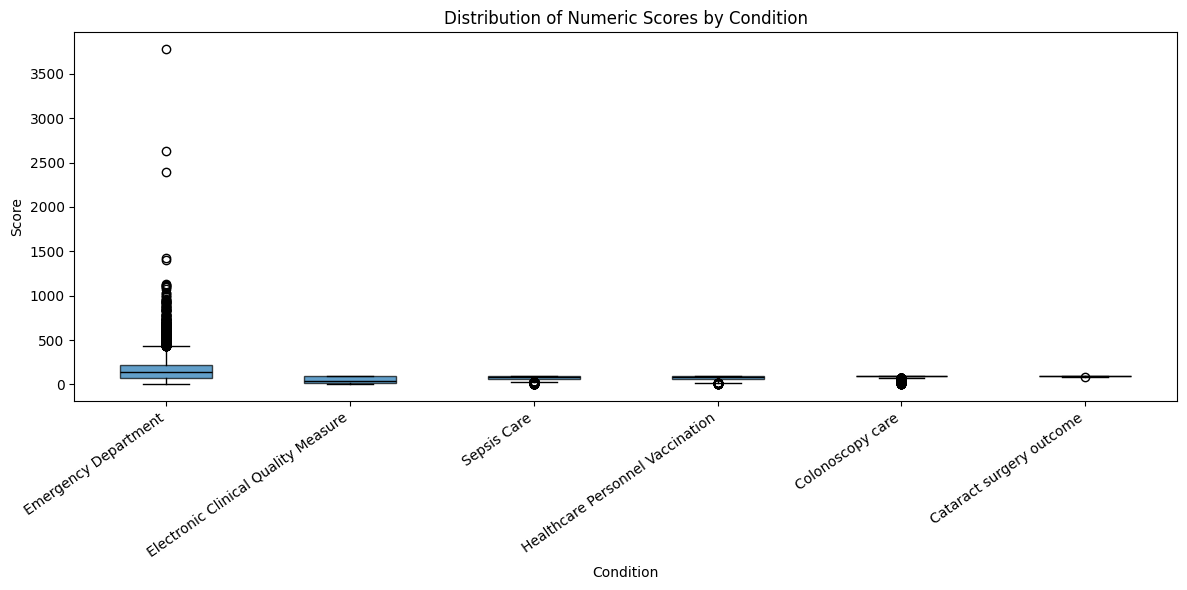

In [10]:
# Figure 1: Distribution of numeric timely and effective care scores by condition
# Drop missing numeric scores
plot_df = merged.dropna(subset=["Score_num"]).copy()

# Keep top 6 conditions by count for readability
cond_order = plot_df["Condition"].value_counts().head(6).index.tolist()
plot_df = plot_df[plot_df["Condition"].isin(cond_order)]

# Build data in the same order as cond_order
data = [
    plot_df.loc[plot_df["Condition"] == cond, "Score_num"].values
    for cond in cond_order
]

plt.figure(figsize=(12, 6))

bp = plt.boxplot(
    data,
    showfliers=True,
    patch_artist=True
)

# Make boxes blue (consistent with other figures)
for box in bp["boxes"]:
    box.set(facecolor="#1f77b4", alpha=0.7)

# Make lines readable
for element in ["whiskers", "caps", "medians"]:
    for item in bp[element]:
        item.set(color="black")

# Explicitly align labels with boxes
plt.xticks(
    ticks=range(1, len(cond_order) + 1),
    labels=cond_order,
    rotation=35,
    ha="right"
)

plt.title("Distribution of Numeric Scores by Condition")
plt.xlabel("Condition")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

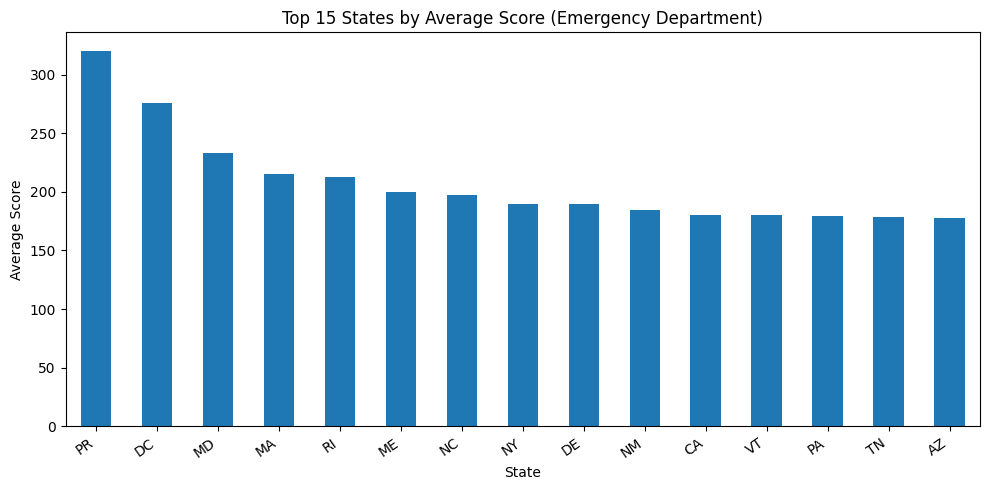

In [11]:
# Figure 2: Top 15 states by average Emergency Department score
condition_choice = "Emergency Department"

state_avg = (merged[merged["Condition"] == condition_choice]
    .dropna(subset=["Score_num"])
    .groupby("State")["Score_num"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10,5))
state_avg.plot(kind="bar")
plt.title(f"Top 15 States by Average Score ({condition_choice})")
plt.ylabel("Average Score")
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.show()

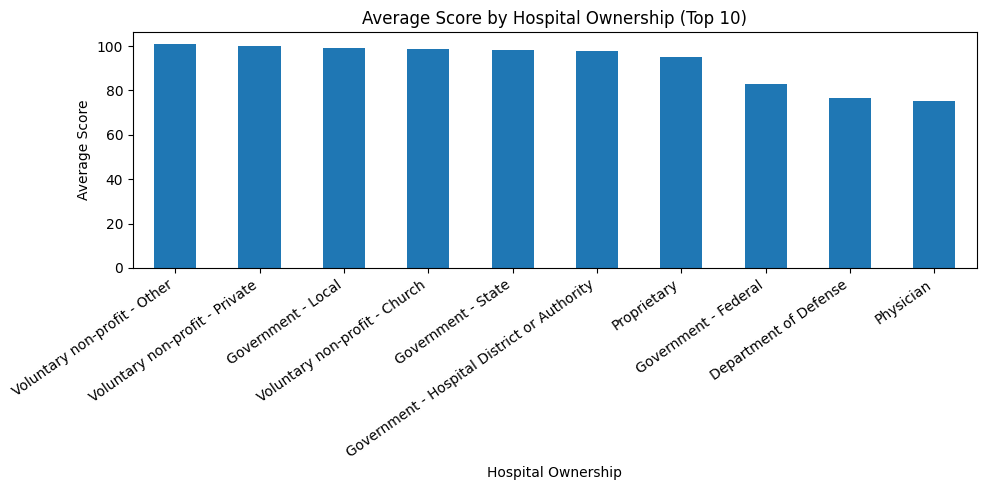

In [12]:
# Figure 3: Average timely and effective care score by hospital ownership
own_avg = (merged
    .dropna(subset=["Score_num"])
    .groupby("Hospital Ownership")["Score_num"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
own_avg.plot(kind="bar")
plt.title("Average Score by Hospital Ownership (Top 10)")
plt.ylabel("Average Score")
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.show()

<Figure size 700x500 with 0 Axes>

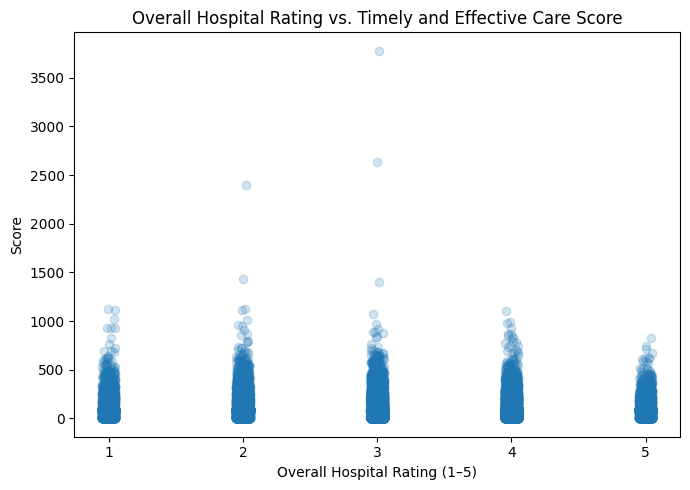

In [13]:
# Figure 4: Relationship between overall hospital rating and performance measure scores
scatter_df = merged.dropna(subset=["Score_num", "Overall_rating_num"]).copy()

plt.figure(figsize=(7,5))
x_jitter = scatter_df["Overall_rating_num"] + np.random.uniform(
    low=-0.05, high=0.05, size=len(scatter_df)
)

plt.figure(figsize=(7,5))
plt.scatter(x_jitter, scatter_df["Score_num"], alpha=0.2)
plt.title("Overall Hospital Rating vs. Timely and Effective Care Score")
plt.xlabel("Overall Hospital Rating (1–5)")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

In [14]:
# Prepare a representative subset of measure names for LLM-based categorization
unique_measures = sorted(merged["Measure Name"].dropna().unique().tolist())
print("Unique measure names:", len(unique_measures))

# If that's too many, focus on the most frequent ones:
measure_list = merged["Measure Name"].value_counts().head(30).index.tolist()
for i, m in enumerate(measure_list, 1):
    print(f"{i}. {m}")

Unique measure names: 30
1. Emergency department volume
2. Global Malnutrition Composite Score
3. Global Malnutrition Composite Score: Malnutrition Diagnosis Documented
4. Global Malnutrition Composite Score: Malnutrition Risk Screening
5. Global Malnutrition Composite Score: Nutrition Assessment
6. Global Malnutrition Composite Score: Nutritional Care Plan
7. Hospital Harm - Severe Hyperglycemia
8. Hospital Harm - Severe Hypoglycemia
9. Hospital Harm - Opioid Related Adverse Events
10. Healthcare workers given influenza vaccination
11. Average (median) time all patients spent in the emergency department before leaving from the visit, including psychiatric/mental health patients and patients who were transferred to another facility. A lower number of minutes is better
12. Average (median) time patients spent in the emergency department before leaving from the visit A lower number of minutes is better
13. Average (median) time patients spent in the emergency department before leaving fr

In [15]:
# LLM-assisted mapping of CMS measure names to categories and score direction
# LLM outputs were reviewed/spot-checked before merging to reduce misclassification risk
import json

llm_json = """
[
  {"measure_name":"Emergency department volume","category":"ED Utilization","direction":"higher_is_better"},
  {"measure_name":"Global Malnutrition Composite Score","category":"Malnutrition Care","direction":"higher_is_better"},
  {"measure_name":"Global Malnutrition Composite Score: Malnutrition Diagnosis Documented","category":"Malnutrition Care","direction":"higher_is_better"},
  {"measure_name":"Global Malnutrition Composite Score: Malnutrition Risk Screening","category":"Malnutrition Care","direction":"higher_is_better"},
  {"measure_name":"Global Malnutrition Composite Score: Nutrition Assessment","category":"Malnutrition Care","direction":"higher_is_better"},
  {"measure_name":"Global Malnutrition Composite Score: Nutritional Care Plan","category":"Malnutrition Care","direction":"higher_is_better"},
  {"measure_name":"Hospital Harm - Severe Hyperglycemia","category":"Patient Safety / Harm","direction":"lower_is_better"},
  {"measure_name":"Hospital Harm - Severe Hypoglycemia","category":"Patient Safety / Harm","direction":"lower_is_better"},
  {"measure_name":"Hospital Harm - Opioid Related Adverse Events","category":"Patient Safety / Harm","direction":"lower_is_better"},
  {"measure_name":"Healthcare workers given influenza vaccination","category":"Healthcare Personnel Vaccination","direction":"higher_is_better"},
  {"measure_name":"Average (median) time all patients spent in the emergency department before leaving from the visit, including psychiatric/mental health patients and patients who were transferred to another facility. A lower number of minutes is better","category":"ED Throughput (Time)","direction":"lower_is_better"},
  {"measure_name":"Average (median) time patients spent in the emergency department before leaving from the visit A lower number of minutes is better","category":"ED Throughput (Time)","direction":"lower_is_better"},
  {"measure_name":"Average (median) time patients spent in the emergency department before leaving from the visit- Psychiatric/Mental Health Patients.  A lower number of minutes is better","category":"ED Throughput (Time)","direction":"lower_is_better"},
  {"measure_name":"Average (median) time transfer patients spent in the emergency department before leaving from the visit. A lower number of minutes is better","category":"ED Throughput (Time)","direction":"lower_is_better"},
  {"measure_name":"Left before being seen","category":"ED Throughput / LWBS","direction":"lower_is_better"},
  {"measure_name":"Head CT results","category":"ED Process / Diagnostics","direction":"higher_is_better"},
  {"measure_name":"Endoscopy/polyp surveillance: appropriate follow-up interval for normal colonoscopy in average risk patients","category":"Colonoscopy Follow-up","direction":"higher_is_better"},
  {"measure_name":"Improvement in Patient's Visual Function within 90 Days Following Cataract Surgery","category":"Cataract Surgery Outcome","direction":"higher_is_better"},
  {"measure_name":"Septic Shock 3-Hour Bundle","category":"Sepsis Bundle Compliance","direction":"higher_is_better"},
  {"measure_name":"Appropriate care for severe sepsis and septic shock","category":"Sepsis Bundle Compliance","direction":"higher_is_better"},
  {"measure_name":"Severe Sepsis 3-Hour Bundle","category":"Sepsis Bundle Compliance","direction":"higher_is_better"},
  {"measure_name":"Septic Shock 6-Hour Bundle","category":"Sepsis Bundle Compliance","direction":"higher_is_better"},
  {"measure_name":"Severe Sepsis 6-Hour Bundle","category":"Sepsis Bundle Compliance","direction":"higher_is_better"},
  {"measure_name":"Safe Use of Opioids - Concurrent Prescribing","category":"Medication Safety (Opioids)","direction":"higher_is_better"},
  {"measure_name":"Anticoagulation Therapy for Atrial Fibrillation/Flutter","category":"Stroke / Anticoagulation Care","direction":"higher_is_better"},
  {"measure_name":"Discharged on Antithrombotic Therapy","category":"Stroke / Antithrombotic Care","direction":"higher_is_better"},
  {"measure_name":"Venous Thromboembolism Prophylaxis","category":"VTE Prevention","direction":"higher_is_better"},
  {"measure_name":"Antithrombotic Therapy by End of Hospital Day 2","category":"Stroke / Antithrombotic Care","direction":"higher_is_better"},
  {"measure_name":"Intensive Care Unit Venous Thromboembolism Prophylaxis","category":"VTE Prevention","direction":"higher_is_better"},
  {"measure_name":"ST-Segment Elevation Myocardial Infarction (STEMI)","category":"Cardiac Care (STEMI)","direction":"higher_is_better"}
]

"""

llm_mapping = pd.DataFrame(json.loads(llm_json))

# Rename to match dataset column exactly
llm_mapping.rename(columns={"measure_name": "Measure Name"}, inplace=True)

print("LLM mapping rows:", llm_mapping.shape)
display(llm_mapping.head())

LLM mapping rows: (30, 3)


,Measure Name,category,direction
0,Emergency department volume,ED Utilization,higher_is_better
1,Global Malnutrition Composite Score,Malnutrition Care,higher_is_better
2,Global Malnutrition Composite Score: Malnutrit...,Malnutrition Care,higher_is_better
3,Global Malnutrition Composite Score: Malnutrit...,Malnutrition Care,higher_is_better
4,Global Malnutrition Composite Score: Nutrition...,Malnutrition Care,higher_is_better


In [16]:
# Merge LLM-derived measure categories into the integrated dataset
merged_llm = merged.merge(
    llm_mapping,
    on="Measure Name",
    how="left"
)

print("Percent of rows with LLM category:",
      merged_llm["category"].notna().mean())

display(
    merged_llm[["Measure Name", "category", "direction"]]
    .dropna()
    .head(10)
)

Percent of rows with LLM category: 1.0


,Measure Name,category,direction
0,Emergency department volume,ED Utilization,higher_is_better
1,Global Malnutrition Composite Score,Malnutrition Care,higher_is_better
2,Global Malnutrition Composite Score: Malnutrit...,Malnutrition Care,higher_is_better
3,Global Malnutrition Composite Score: Malnutrit...,Malnutrition Care,higher_is_better
4,Global Malnutrition Composite Score: Nutrition...,Malnutrition Care,higher_is_better
5,Global Malnutrition Composite Score: Nutrition...,Malnutrition Care,higher_is_better
6,Hospital Harm - Severe Hyperglycemia,Patient Safety / Harm,lower_is_better
7,Hospital Harm - Severe Hypoglycemia,Patient Safety / Harm,lower_is_better
8,Hospital Harm - Opioid Related Adverse Events,Patient Safety / Harm,lower_is_better
9,Healthcare workers given influenza vaccination,Healthcare Personnel Vaccination,higher_is_better


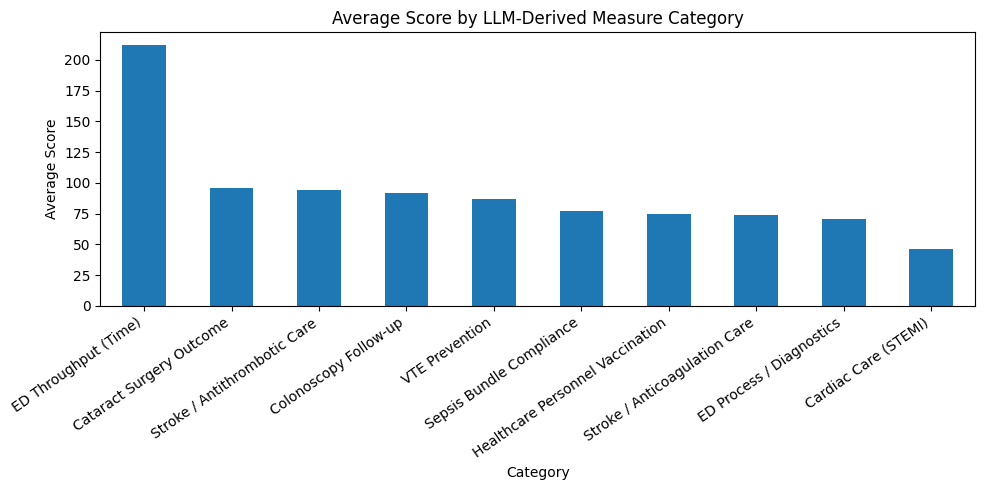

In [17]:
# Figure 5: Average timely and effective care score by LLM-derived measure category
cat_avg = (
    merged_llm
    .dropna(subset=["Score_num", "category"])
    .groupby("category")["Score_num"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
cat_avg.plot(kind="bar")
plt.title("Average Score by LLM-Derived Measure Category")
plt.xlabel("Category")
plt.ylabel("Average Score")
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.show()